<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [75]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, t


%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [18]:
# Read Titanic Dataset
titanic_csv = 'titanic_train.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [16]:

print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Tail

In [18]:
print(titanic.tail())



     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


## Shape

Find shape of dataset.

In [22]:
shape = titanic.shape
print("Shape of the Titanic dataset:", shape)


Shape of the Titanic dataset: (891, 12)


## Check Types of Data

Check types of data you have

In [24]:
data_types = titanic.dtypes
print(data_types)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Check Null Values

Check whether dataset have any null values.

In [26]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns?

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every step

### Age

In [9]:
titanic['Age'].fillna(titanic.groupby('Sex')['Age'].transform('median'), inplace=True)


In [11]:
null_age_count_after_fill = titanic['Age'].isna().sum()

In [13]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Cabin

In [15]:
titanic['Cabin'].fillna('Unknown', inplace=True)


In [17]:
null_cabin_count_after_fill = titanic['Cabin'].isna().sum()

In [19]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  Unknown        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  Unknown        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  Unk

### Embarked

In [29]:
mode_embarked = titanic['Embarked'].mode()[0]


In [31]:
titanic['Embarked'].fillna(mode_embarked, inplace=True)

In [33]:
null_embarked_count_after_fill = titanic['Embarked'].isna().sum()

In [35]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  Unknown        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  Unknown        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  Unk

# Describe

Describe your dataset.

In [39]:
description = titanic.describe(include='all')

In [43]:
print(description)

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [45]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)

    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use the `bar_charts` function above to view the relationship between survived and pclass.  Note your findings.

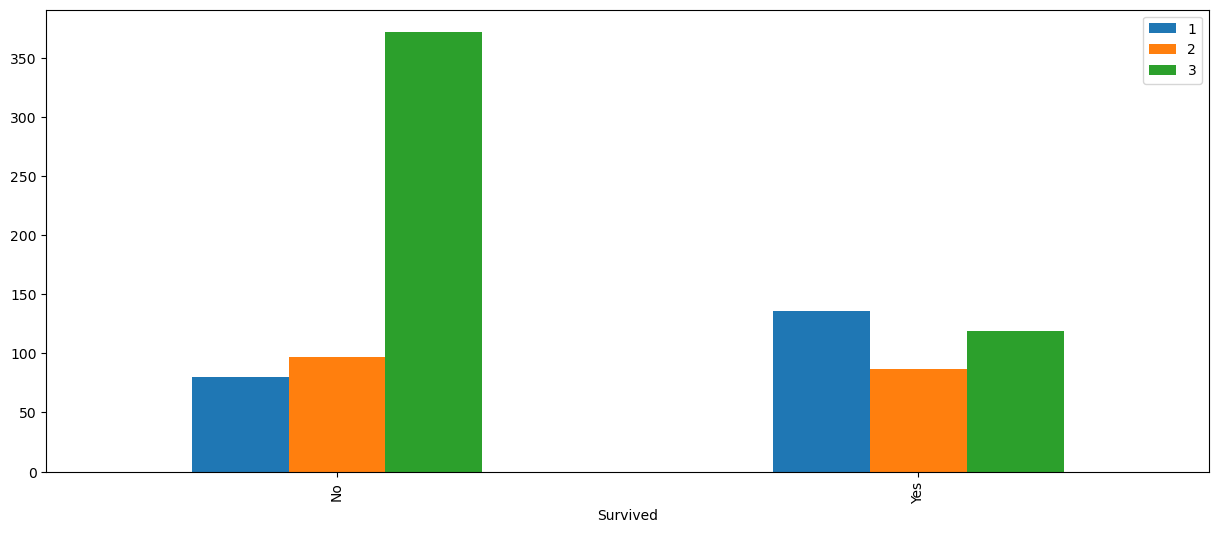

In [47]:
bar_charts(titanic, 'Pclass')


## Sex

Use `bar_charts` to view the relationship between survived and sex.  Note your findings.

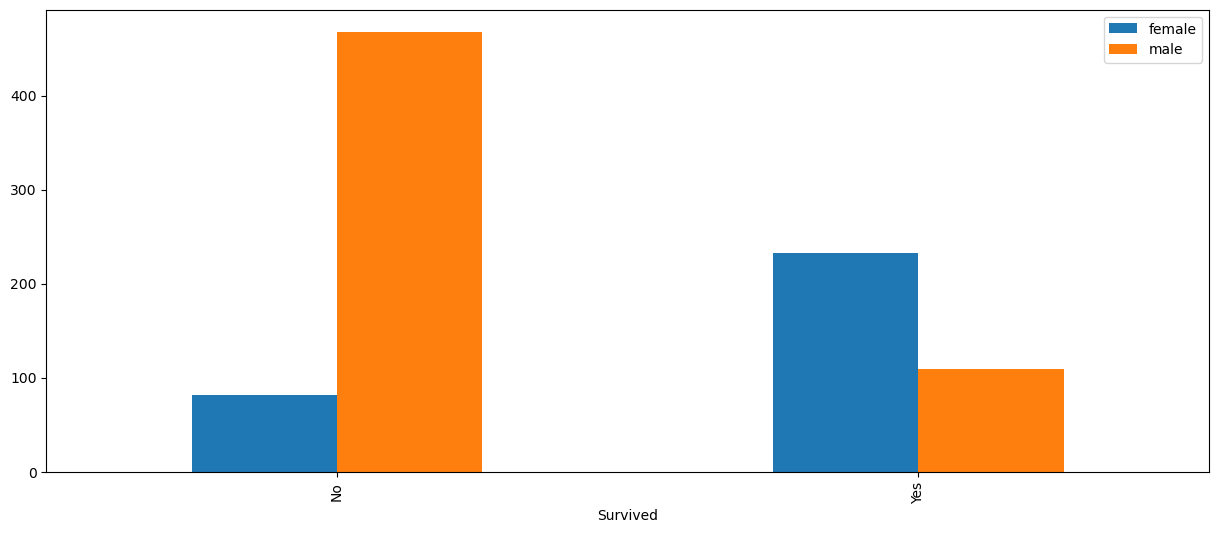

In [49]:
bar_charts(titanic, 'Sex')


## Parch

Parch = Number of parents and children travelling with each passenger. Use `bar_charts` to view the relationship between survived and Parch.

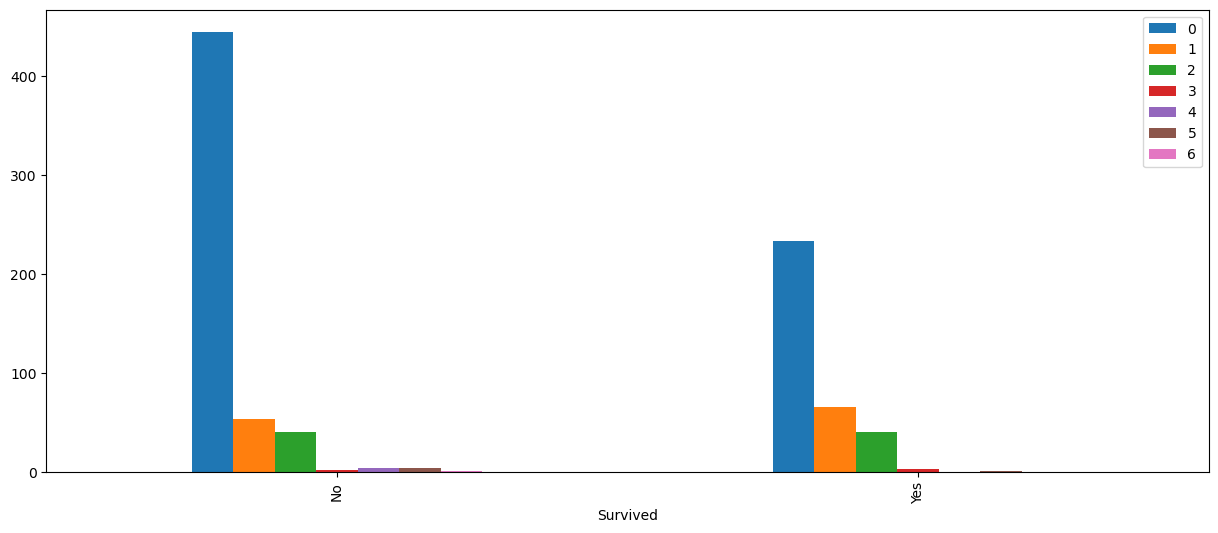

In [51]:
bar_charts(titanic, 'Parch')


## SibSp

SibSp = Number of siblings and spouses travelling with each passenger. Use `bar_charts` to view the relationship between survived and SibSp.

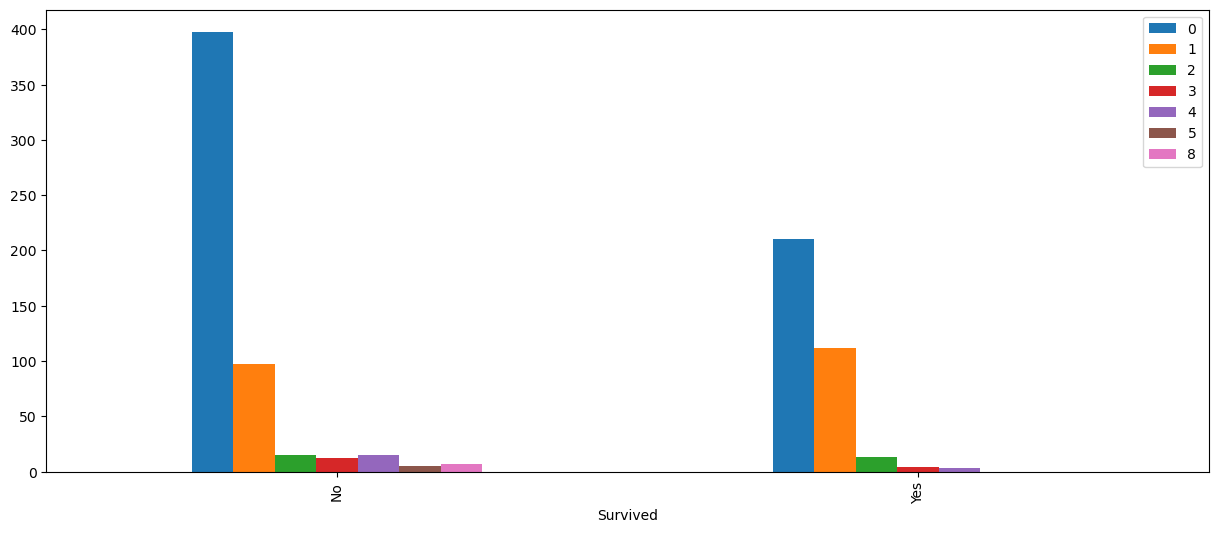

In [53]:

bar_charts(titanic, 'SibSp')



## Embarked

Do the same for the Embarked variable.

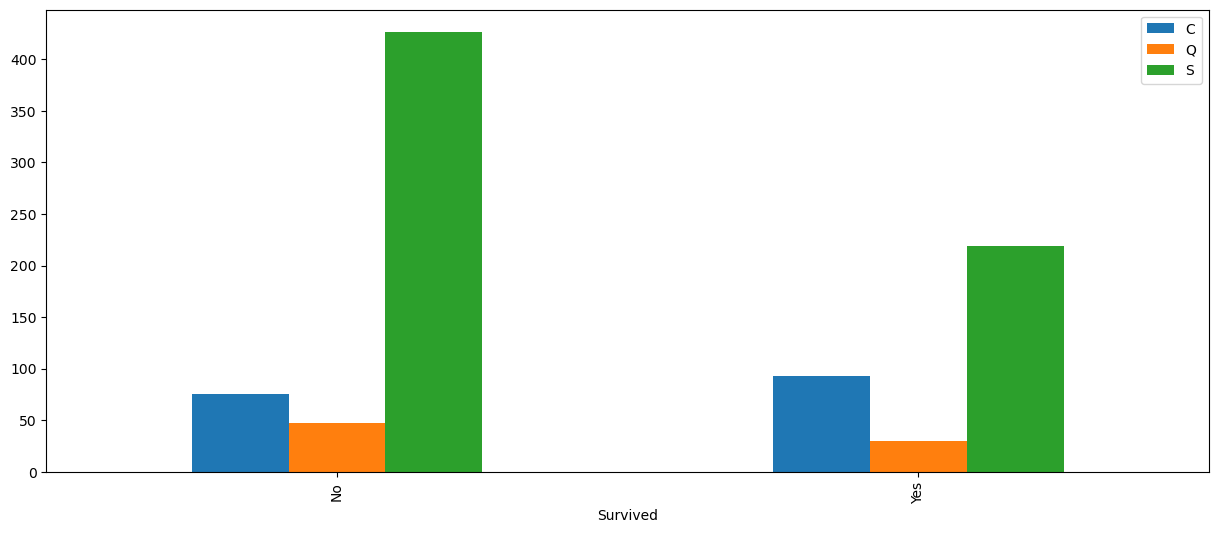

In [55]:
bar_charts(titanic, 'Embarked')


# Feature Engineering

We shall create some new features from the existing features.

## Fare Class

Create a new column 'Fare class' based on their fare as defined below. Is there any relationship between fare and survival?

In [57]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [65]:

titanic['Fare class'] = titanic['Fare'].apply(create_fare_class)

In [69]:
fare_class_counts = titanic['Fare class'].value_counts().sort_index()

<Axes: xlabel='Fare class'>

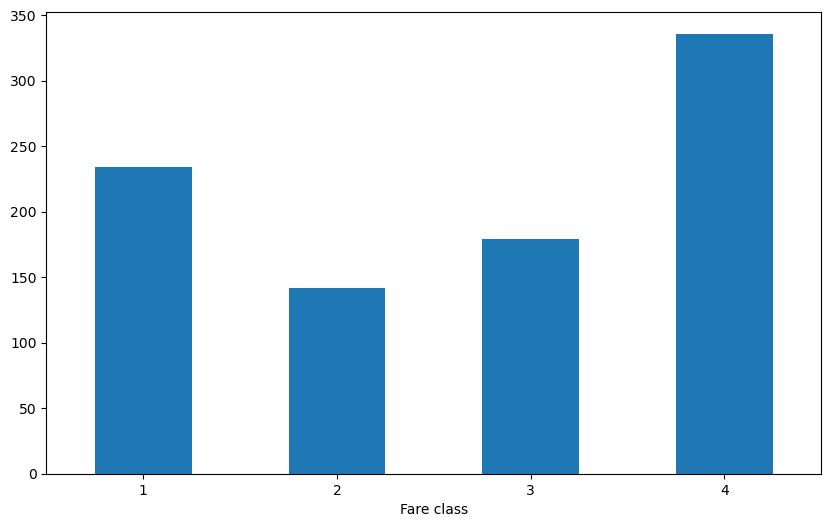

In [75]:
fare_class_counts.plot(kind='bar', figsize=(10, 6), rot=0)

## Age Class

Similarly, create a new column 'Age class' based on their age as defined below.

In [81]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [83]:

titanic['Age class'] = titanic['Age'].apply(create_age_class)


In [85]:
age_class_counts = titanic['Age class'].value_counts().sort_index()

<Axes: xlabel='Age class'>

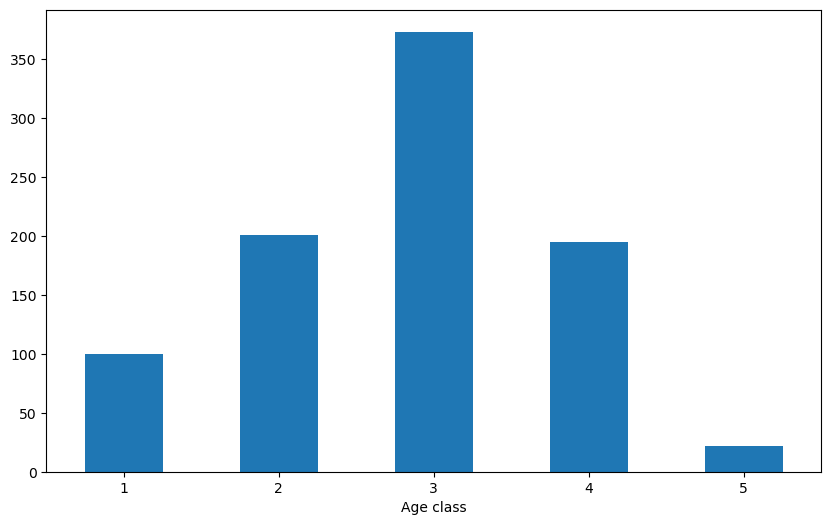

In [87]:
age_class_counts.plot(kind='bar', figsize=(10, 6), rot=0)

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [89]:
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [91]:
correlation_matrix = titanic[['Survived'] + numerical_features].corr()

In [93]:
print(correlation_matrix)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.073296 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.338056  0.083081  0.018443 -0.549500
Age      -0.073296 -0.338056  1.000000 -0.236376 -0.176038  0.094161
SibSp    -0.035322  0.083081 -0.236376  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.176038  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.094161  0.159651  0.216225  1.000000


# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group.

Collect two sets of data, one with passengers who survived and another one with passengers who died (call them `titanic_survived` and `titanic_died`). The sample sizes should ideally be the same but they can be different. Let's say that the sample sizes are 100.

In [97]:
sample_size = 100



In [141]:
titanic_survived = titanic[titanic['Survived'] == 1].sample(n=sample_size, random_state=1)


In [143]:
titanic_died = titanic[titanic['Survived'] == 0].sample(n=sample_size, random_state=1)

In [145]:
print(f"Number of samples collected for passengers who died: {len(titanic_died)}")

Number of samples collected for passengers who died: 100


In [147]:
a = titanic_survived['Age']
b = titanic_died['Age']
print("Ages of passengers who survived:")


Ages of passengers who survived:


### Set alpha (let alpha = 0.05)


In [149]:
alpha = 0.05



### Calculate test statistic

> Here we identify a test statistic that can be used to assess the truth of the null hypothesis.

In [20]:
## Calculate the variance to get the standard deviation
a = titanic['Age'].dropna()
b = titanic['Fare'].dropna()
mean_a = np.mean(a)
mean_b = np.mean(b)
var_a = np.var(a, ddof=1)
var_b = np.var(b, ddof=1)
n_a = len(a)
n_b = len(b)
s = np.sqrt((var_a + var_b) / 2)


In [42]:
# Calculate t-statistic
t_statistic = (mean_a - mean_b) / (s * np.sqrt(2 / n_a))
t_stat, p_value = stats.ttest_ind(a, b, equal_var=True)
print("Calculated t-statistic:", t_statistic)
print("Scipy t-statistic:", t_stat)



Calculated t-statistic: -1.292909587708608
Scipy t-statistic: -1.3030705278839982


### Find the p-value

> Next we compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [55]:
age_survived = titanic[titanic['Survived'] == 1]['Age']
age_not_survived = titanic[titanic['Survived'] == 0]['Age']

# Perform the two-sample t-test
t_stat, p = ttest_ind(age_survived, age_not_survived)

# Calculate degrees of freedom
n1 = len(age_survived)
n2 = len(age_not_survived)
dof = n1 + n2 - 2

# Print the results
print("t-test statistic:", t_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean age between survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean age between survivors and non-surviors.")












t-test statistic: nan
p-value: nan
Degrees of freedom: 889
Fail to reject the null hypothesis: There is no significant difference in the mean age between survivors and non-surviors.


In [77]:
# Perform the two-sample t-test
t_stat, p = ttest_ind(age_survived, age_not_survived, equal_var=False)  # Welch's t-test

# Calculate degrees of freedom using the Welch-Satterthwaite equation
n1 = len(age_survived)
n2 = len(age_not_survived)
v1 = np.var(age_survived, ddof=1)
v2 = np.var(age_not_survived, ddof=1)
dof = (v1/n1 + v2/n2)**2 / ((v1/n1)**2 / (n1 - 1) + (v2/n2)**2 / (n2 - 1))

# Determine the critical t-value for a two-tailed test
alpha = 0.05
critical_t = t.ppf(1 - alpha/2, dof)

# Print the results
print("t-test statistic:", t_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Critical t-value for alpha=0.05:", critical_t)

# Interpret the t-test statistic
if abs(t_stat) > critical_t:
    print("Reject the null hypothesis: There is a significant difference in the mean age between survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean age between survivors and non-survivors.")




    


t-test statistic: nan
p-value: nan
Degrees of freedom: 694.2322399933571
Critical t-value for alpha=0.05: 1.9633869632517378
Fail to reject the null hypothesis: There is no significant difference in the mean age between survivors and non-survivors.


In [79]:
print("t = " + str(t))
print("p = " + str(p))

t = <scipy.stats._continuous_distns.t_gen object at 0x00000234858FFCD0>
p = nan


### Interpret results

> The p-value is compared to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [67]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    else:
        print("We fail to reject our null hypothesis.")

In [69]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = -1.3030705278839982
p = 0.19273782567598113
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



